# Análise Exploratória com Python
## Exploratory Analysis with Python

##### Imagine um cenário onde você precisa prever o valor de venda de um imóvel considerando suas características, mas antes disso precisamos passar por uma etapa importante de preparação e análise dos dados, desta forma ficamos mais embasados para construir nossos algoritmos de Machine Learning.
#### This is case where we need predict the value of house sold, but is necessary analysing the data before.

###### OBS: Nosso objetivo aqui será até a etapa de Análise dos dados, o tema ML abordaremos em outro momento.
###### Important: We don´t talk about machine learning here, we´ll see this coming soon

In [1]:
## Importando pacotes
## Import libs

import pandas as pd
import sweetviz as SW ##Caso nao tenha instalado já, importante realizar via PIP
import matplotlib as mt
import matplotlib.pyplot as plt

In [ ]:
import 

In [2]:
## Importando o arquivo bruto armazenando em uma variável e visualizando dados
## Importing this file, storing in the Var and show in console

df = pd.read_csv("../DataBase/Imoveis_venda.csv"
                 , sep=',')
df.head()

,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,3.0,2.0,0.0,2.0,Uvaranas,164.0,430000.0
1,148460-4,3.0,2.0,1.0,3.0,Jardim Carvalho,NaN,350000.0
2,154166-4,3.0,1.0,1.0,1.0,Oficinas,NaN,300000.0
3,146507-4,3.0,2.0,1.0,2.0,Uvaranas,80.0,169900.0
4,154050-4,2.0,1.0,0.0,1.0,Uvaranas,NaN,165000.0


In [4]:
## Aqui é importante ver os tipos de dados que temos
## Important see de data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Referência        3576 non-null   object 
 1   Quartos           3214 non-null   float64
 2   Banheiros         2994 non-null   float64
 3   Suítes            3576 non-null   float64
 4   Vagas de Garagem  2329 non-null   float64
 5   Bairro            3576 non-null   object 
 6   Área Total        2756 non-null   float64
 7   Valor Venda       3573 non-null   float64
dtypes: float64(6), object(2)
memory usage: 195.6+ KB


In [21]:
#Avaliando dados vazios/Nulos
#Avaliable Null datas

df.isnull().sum()

Referência             0
Quartos              362
Banheiros            582
Suítes                 0
Vagas de Garagem    1247
Bairro                 0
Área Total           820
Valor Venda            3
dtype: int64


#### Uma coisa importante a se fazer é tratar os dados, dependendo do algoritmo que for utilizar é sempre importante categorizá-los. Neste caso vou transformar os campos que estão como float em inteiros.

#### Is very important analysing the data types, because many times have data that we need to transform into categorical or numerical data.

 

In [32]:
##Vamos transformar os dados que estão como Float em Int. Não se esqueça dos campos vazios
##Letś transformation the datas that are like Float in Int. Don forget 

df['Quartos'] = df['Quartos'].fillna(0.0).astype(int)
df['Banheiros'] = df['Banheiros'].fillna(0.0).astype(int)
df['Suítes'] = df['Suítes'].fillna(0.0).astype(int)
df['Vagas de Garagem'] = df['Vagas de Garagem'].fillna(0.0).astype(int)
df['Área Total'] = df['Área Total'].fillna(0.0).astype(int)
df['Valor Venda'] = df['Valor Venda'].fillna(0.0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Referência        3576 non-null   object
 1   Quartos           3576 non-null   int32 
 2   Banheiros         3576 non-null   int32 
 3   Suítes            3576 non-null   int32 
 4   Vagas de Garagem  3576 non-null   int32 
 5   Bairro            3576 non-null   object
 6   Área Total        3576 non-null   int32 
 7   Valor Venda       3576 non-null   int32 
dtypes: int32(6), object(2)
memory usage: 111.8+ KB



### Claro que se estudarmos a fundo, podemos dizer que temos mais passos a se fazer, mas estamos apenas simplificando o processo para dar uma idéia dos processos.

### We have more steps to do , but, letś simplify de process and undertanding what gonna doing



Vamos Analisar agora algumas medidas de distribuição e de posição

Letś see some measures of position and distribuition

In [33]:
df.describe()

,Quartos,Banheiros,Suítes,Vagas de Garagem,Área Total,Valor Venda
count,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3.576000e+03
mean,2.677013,1.775727,0.729586,1.428971,177.634787,5.846469e+05
std,1.172404,1.415215,0.994180,1.433462,257.214578,6.158823e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,0.000000,0.000000,48.000000,1.977500e+05
50%,3.000000,1.000000,0.000000,1.000000,118.000000,3.605000e+05
75%,3.000000,3.000000,1.000000,2.000000,266.000000,7.500000e+05
max,9.000000,8.000000,7.000000,10.000000,10000.000000,5.200000e+06


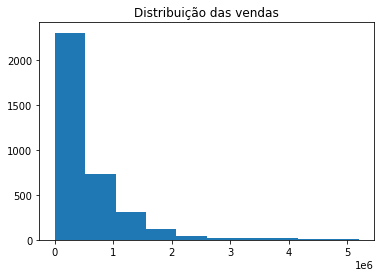

In [28]:
##Vamos analisar a distribuição dos dados
##Letś show de histogramn


plt.hist(df['Valor Venda'])
plt.title('Distribuição das vendas')
plt.show()

Ja podemos ver que se trata de uma distribuição assimétrica avaliando os valores de vendas

We can see de assimetric distribuition 

<function matplotlib.pyplot.show(close=None, block=None)>

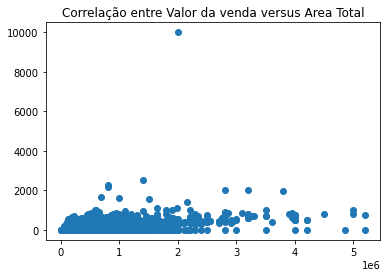

In [31]:
## vamos testar um grafico de correlação simples entre vendas e area total
## Lets testing a simple correlation plot between Soldś versus Total Area

plt.scatter(df['Valor Venda'],df['Área Total'])
plt.title('Correlação entre Valor da venda versus Area Total')
plt.show

O mais bacana é que temos um universo de possibilidades de analise. Com a biblioteca SweetViz por exemplo, conseguimos ter uma série de visões para avaliar os cenários

Thatś amaizing. We have many forms to analysing. So, lets see the lib SweetViz

In [35]:
my_report = SW.analyze(df,"Valor Venda")

                                             |          | [  0%]   00:00 -> (? left)


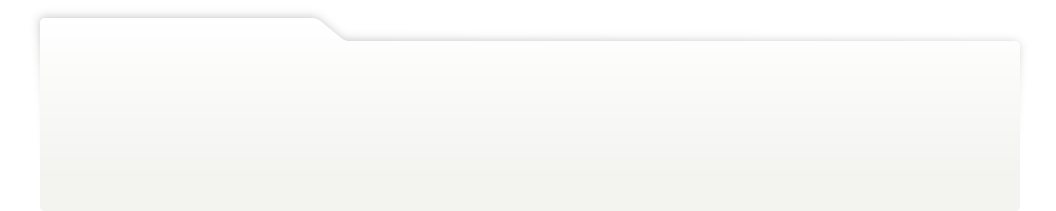
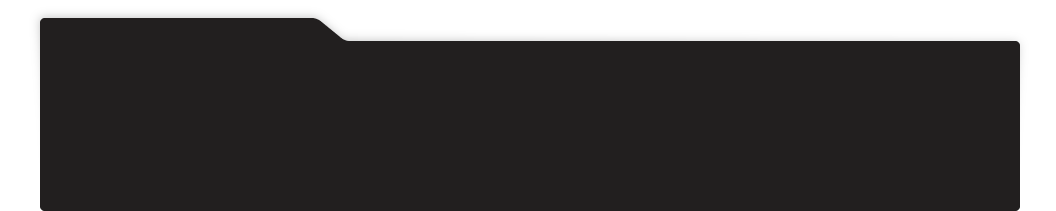
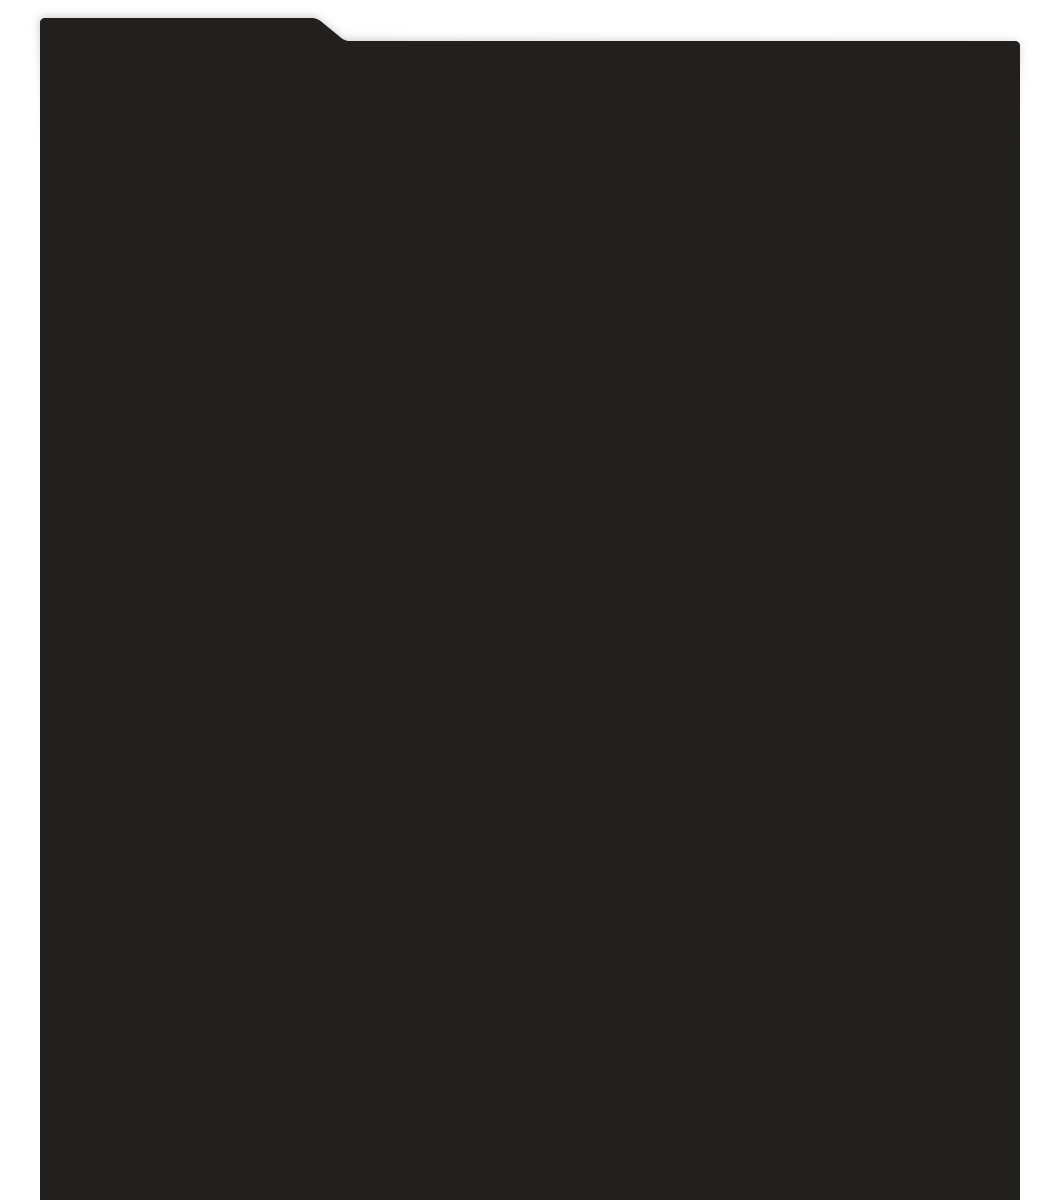
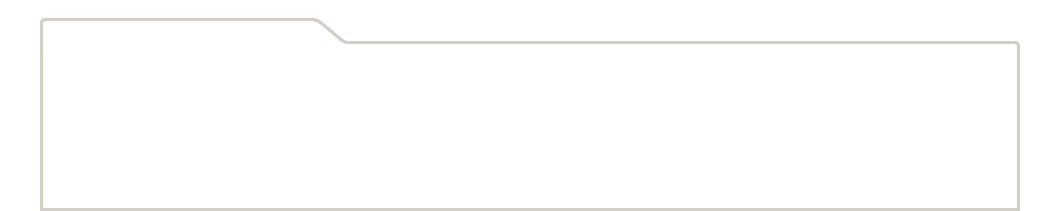
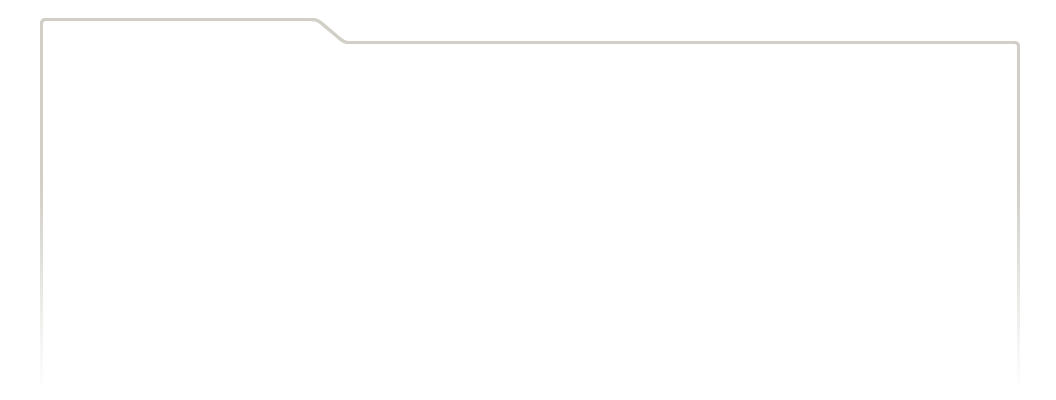
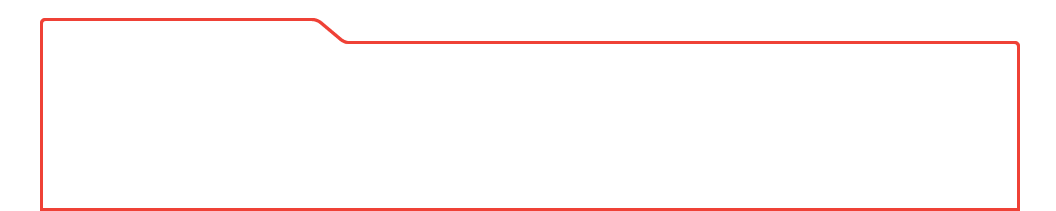
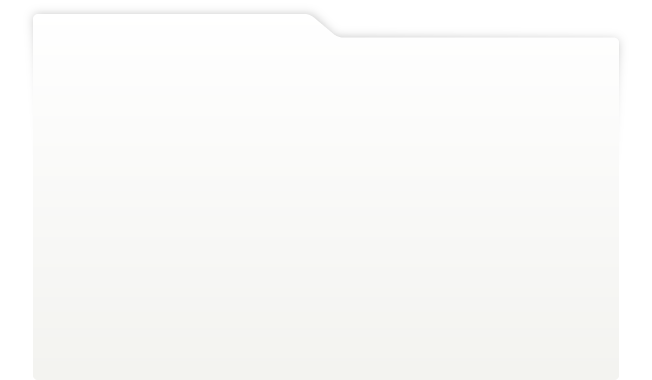
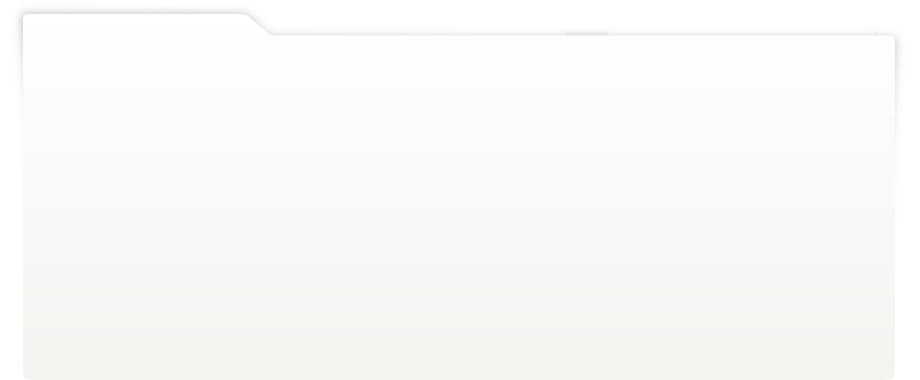
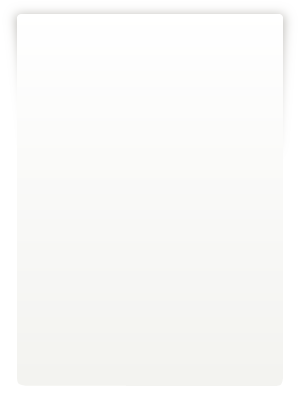
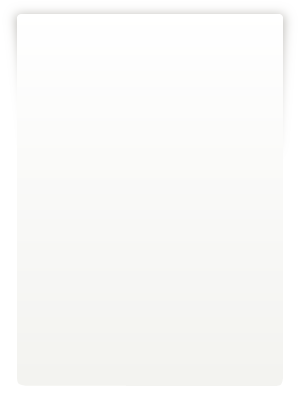
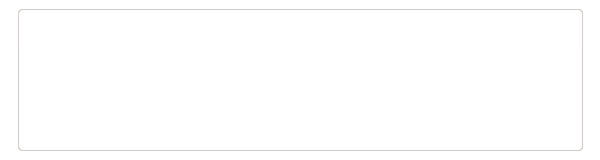
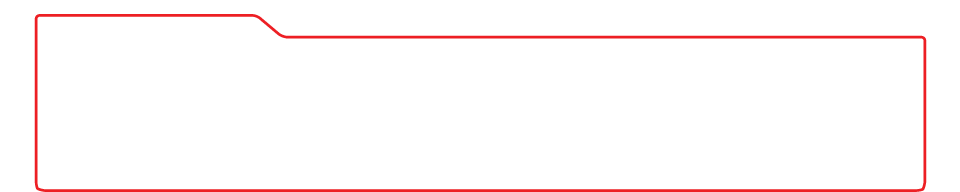
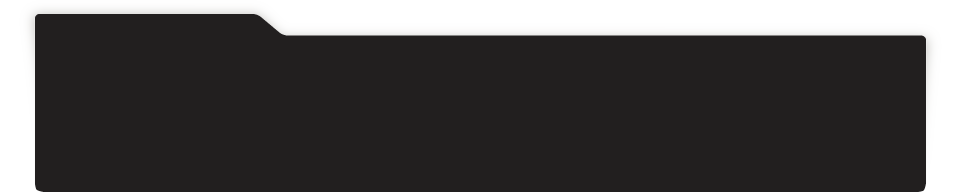
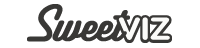
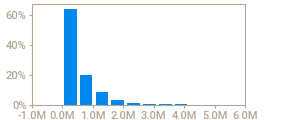
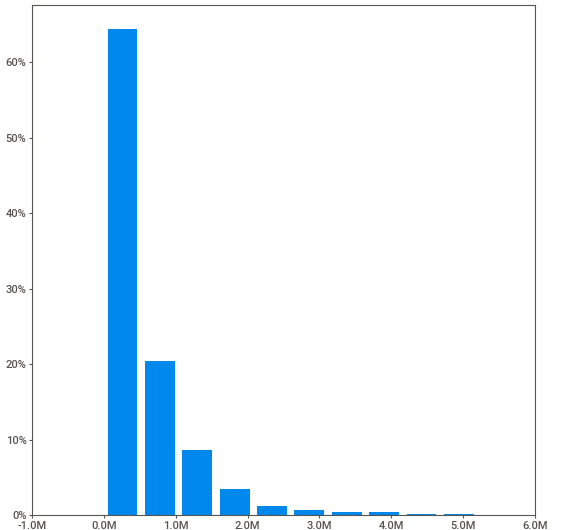
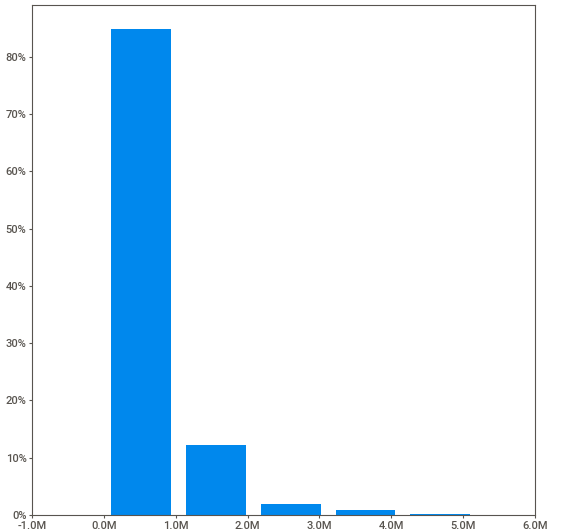
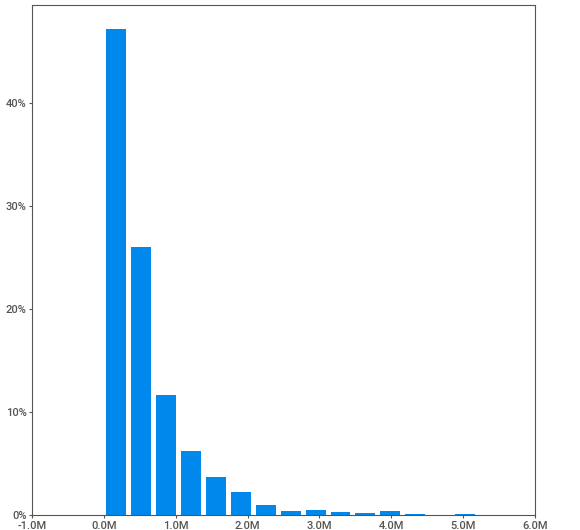
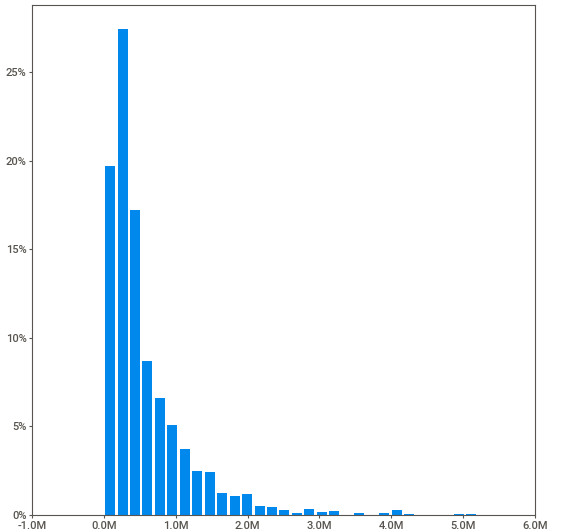
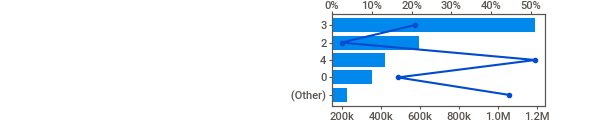
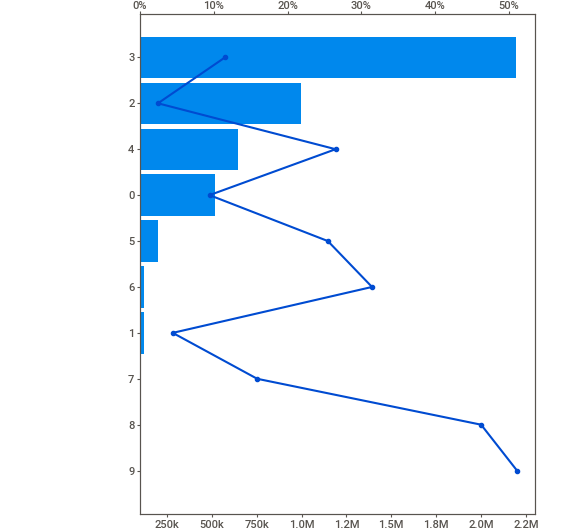
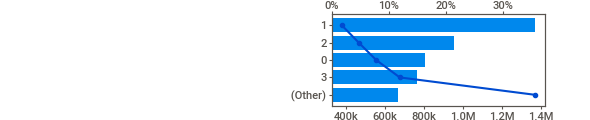
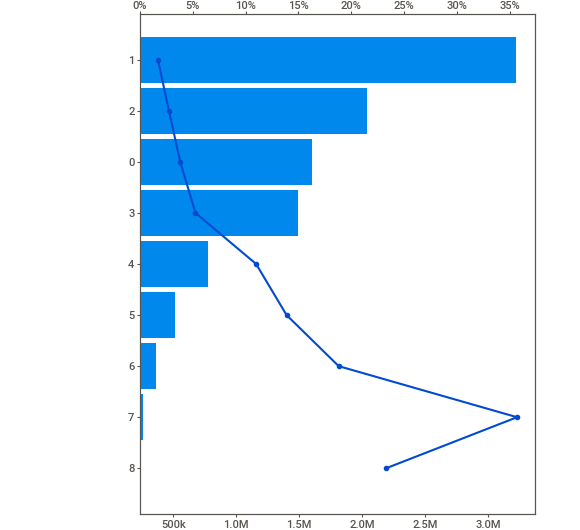
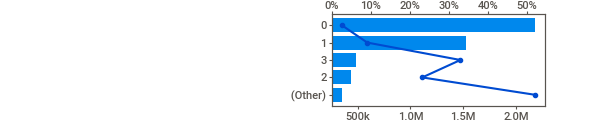
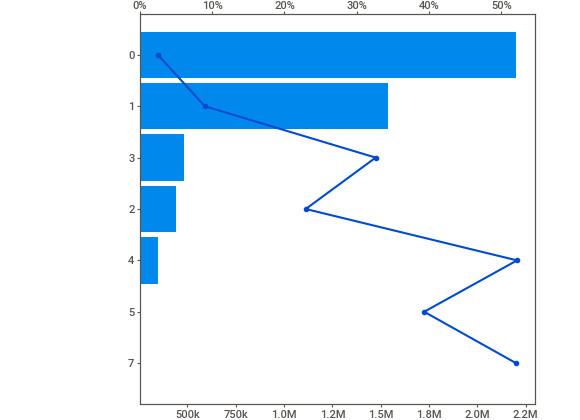
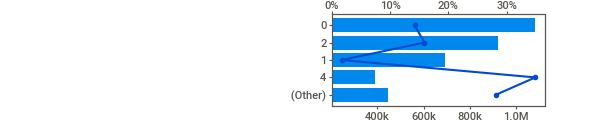
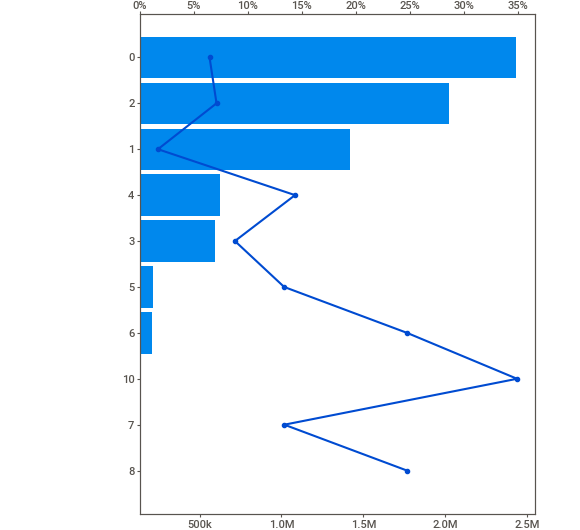
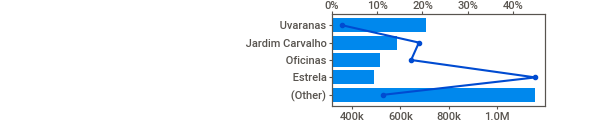
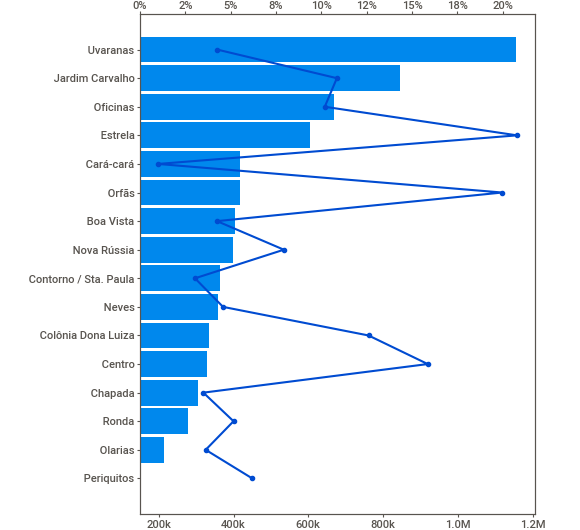
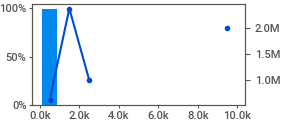
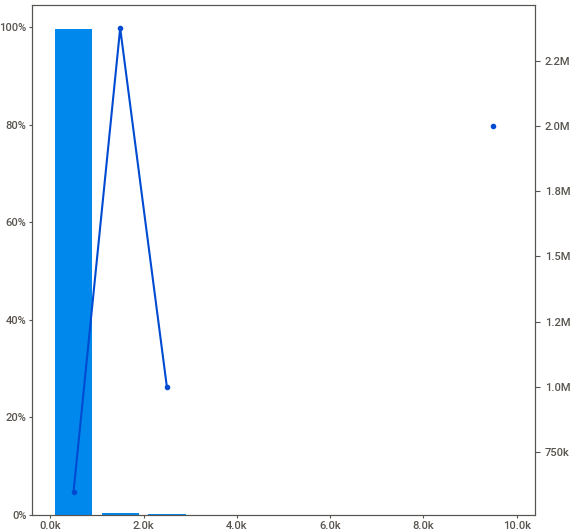
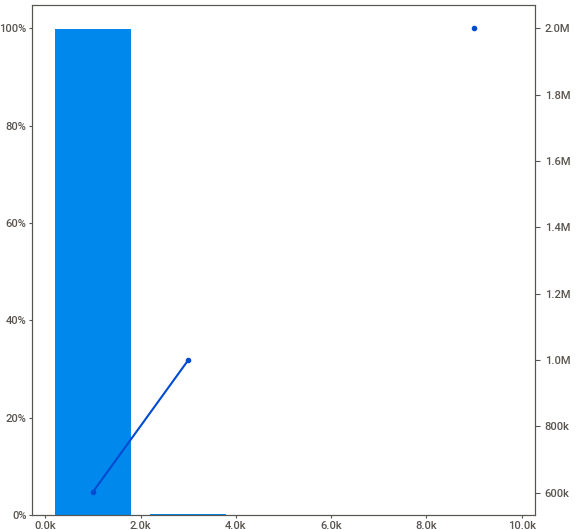
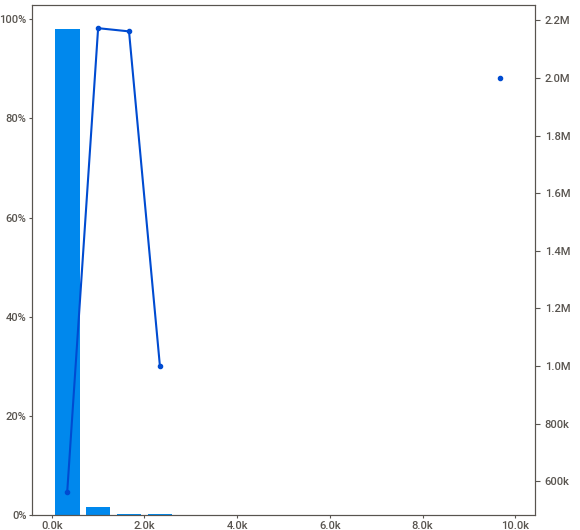
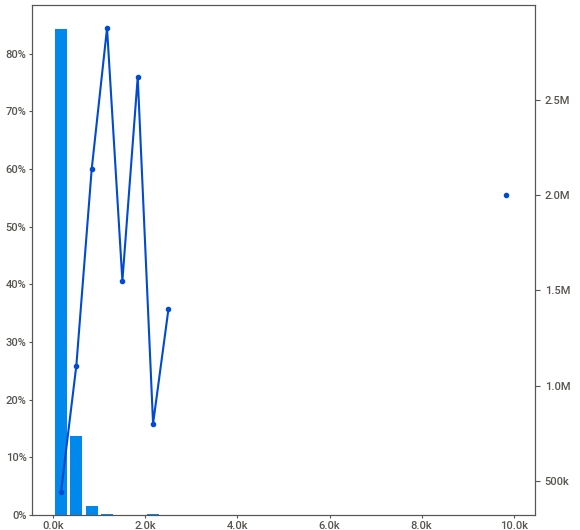
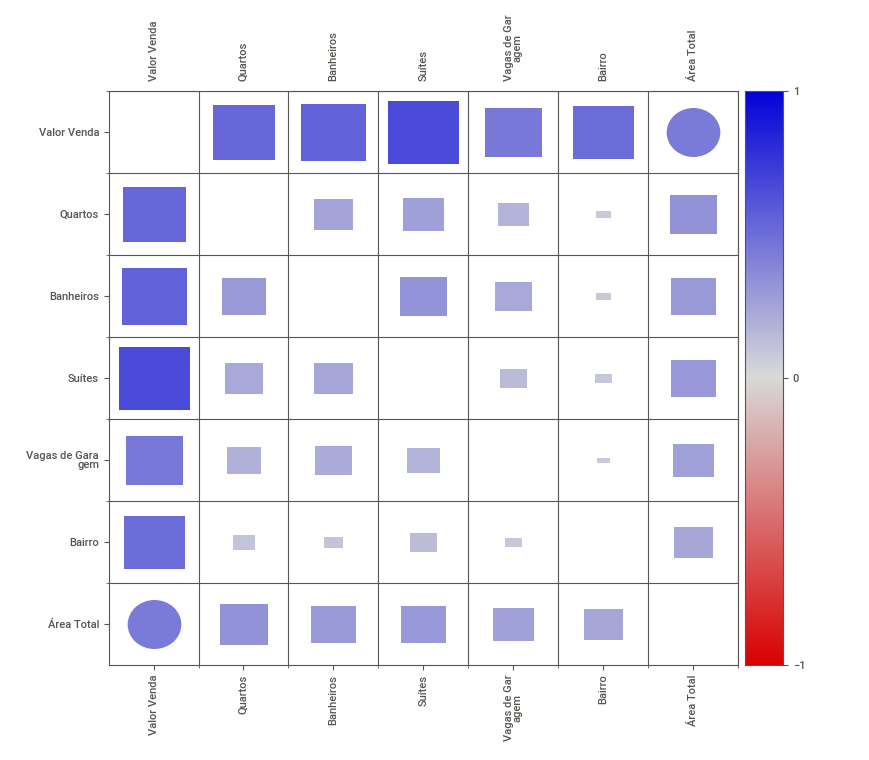
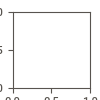

In [36]:
#Podemos abrir em outra guia usando show_html
#We can open the datas using the show_html
my_report.show_notebook()

# Resumão (Summary)

## Temos muitos recursos para realizar nossas analises e tomar as decisoes certas na hora de iniciar nossos projetos de analise de dados.

Pesquisem bastante sobre as bibliotecas supracitadas e façam simulações para ir aprimorando as técnicas.

Espero que tenham gostado e bora Estudar!


Git -> JoseGJunior